## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()
# Combine the data into a single dataset
combined_study_results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the DataFrame.
#combined_study_results.count()
index = pd.Index(combined_study_results['Drug Regimen'])
index.value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_duplicates = combined_study_results[combined_study_results.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
data_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
d = combined_study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'last')
d.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [48]:
d = d.sort_values(["Tumor Volume (mm3)"], ascending=True)
d_start = d[d['Timepoint']==0]
d_end = d[d['Timepoint']==45]
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mousestudy_summary = d.groupby(["Drug Regimen"])
mousestudy_count_df = pd.DataFrame(mousestudy_summary['Mouse ID'].count())
#Use groupby to create summary stats by drug regime, add results into columns in 
mean_summary = mousestudy_summary["Tumor Volume (mm3)"].mean()
median_summary = mousestudy_summary["Tumor Volume (mm3)"].median()
std_summary = mousestudy_summary["Tumor Volume (mm3)"].std()
var_summary = mousestudy_summary["Tumor Volume (mm3)"].var()
sem_summary = mousestudy_summary["Tumor Volume (mm3)"].sem()

summarystats = pd.DataFrame({"Mean":mean_summary, "Median":median_summary, "Standard Deviation":std_summary,"SEM":sem_summary})
#var_summary.count()
summarystats.sort_values(['Mean'],ascending = True)
#d_end.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Ramicane,40.216745,40.673236,4.846308,0.320955
Capomulin,40.675741,41.557809,4.994774,0.329346
Propriva,52.382993,50.783528,6.574208,0.526358
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Zoniferol,53.236507,51.818479,6.966589,0.516398
Placebo,54.033581,52.288934,7.821003,0.581331
Stelasyn,54.233149,52.431737,7.710419,0.573111
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar Plots

In [49]:
mousestudy_count_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [50]:
# Generate a bar plotshowing the number of mice per time point for each treatment throughout the course of the study using pandas.
#mice count vs timepoint
#timepoint = d.set_index('Timepoint')
#x_axis = np.arange(len(users))
timepointstats = pd.DataFrame(d.groupby("Timepoint").count())
timepointstats = timepointstats.drop(['Drug Regimen','Sex','Age_months','Weight (g)','Tumor Volume (mm3)','Metastatic Sites'],axis=1)

timepointstats

,Mouse ID
Timepoint,
0,249
5,237
10,222
15,206
20,194
25,183
30,171
35,154
40,142


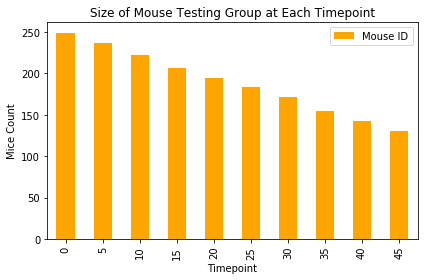

In [51]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Create a bar chart based off of the group series from before and label the title 
count_chart = timepointstats.plot(kind='bar', title="Size of Mouse Testing Group at Each Timepoint", color="orange") 
 
# Set the xlabel and ylabel using class methods 
count_chart.set_xlabel("Timepoint") 
count_chart.set_ylabel("Mice Count") 
plt.tight_layout() 

# Save the figure 
 
plt.show()

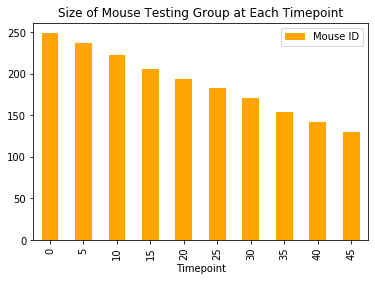

In [52]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
timepointstats.plot.bar(color = 'orange',title = 'Size of Mouse Testing Group at Each Timepoint')

## Pie Plots

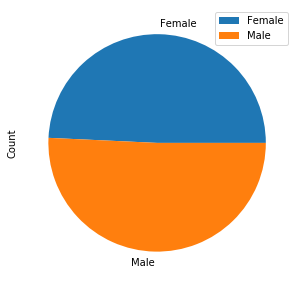

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = d.groupby('Sex')
gender_df.head()
# Create a dataframe counting the number of data points for each gender
gender_df = pd.DataFrame(gender_df['Sex'].count())
gender_df = gender_df.rename(columns={'Sex': 'Count'})

# View the groupby dataframe
gender_df.head()

gender_df.plot.pie(y='Count',figsize=(5,5))

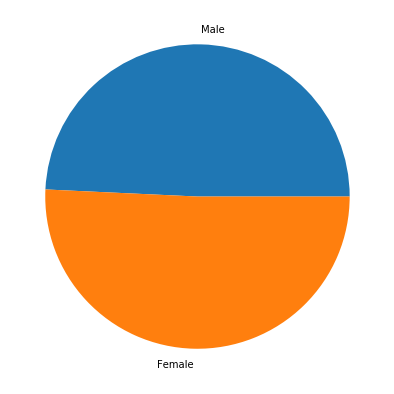

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = gender_df['Count']
labels = ['Male','Female']
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#new dataframe for QO&A
high_performers_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
high_performers = d[d['Drug Regimen'].isin(high_performers_list)]
high_performers = high_performers.sort_values(["Timepoint"], ascending=True)

high_performers.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
450,y449,Ramicane,Male,19,24,0,45.0,0
1024,k210,Ceftamin,Male,15,28,0,45.0,0
1044,k483,Infubinol,Female,20,30,0,45.0,0
984,j296,Ceftamin,Female,24,30,0,45.0,0
1120,l558,Ceftamin,Female,13,30,0,45.0,0


In [56]:

tumors_aftertreatment = high_performers.groupby(['Drug Regimen','Mouse ID']).agg(\
                        final_tumorsize =('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

tumors_aftertreatment
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = tumors_aftertreatment.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()


,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,final_tumorsize,NaN,NaN,67.973,NaN
a251,final_tumorsize,NaN,NaN,65.526,NaN
a275,final_tumorsize,NaN,62.999,NaN,NaN
a411,final_tumorsize,NaN,NaN,NaN,38.408
a444,final_tumorsize,NaN,NaN,NaN,43.048


In [57]:


# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for performer in high_performers_list:
    quartiles = four_last_tumor_unstack[performer].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{performer} IQR data is:")
    print(f"The lower quartile of {performer} is: {lowerq}")
    print(f"The upper quartile of {performer} is: {upperq}")
    print(f"The interquartile range of {performer} is: {iqr}")
    print(f"The the median of {performer} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {performer} could be outliers.")
    print(f"Values above {upper_bound} for {performer} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


In [58]:
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for performer in high_performers_list:
    boxplot_list.append(list(four_last_tumor_unstack[performer].dropna()))

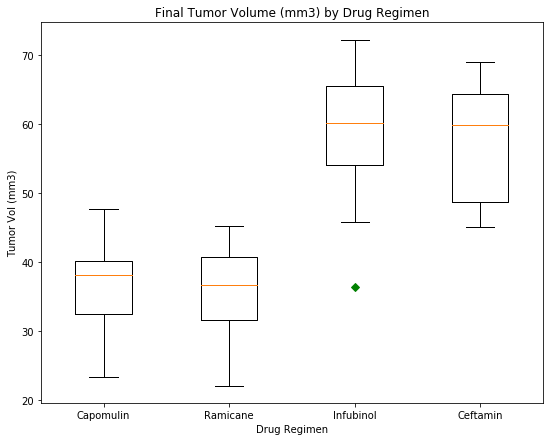

In [59]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume (mm3) by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],high_performers_list)

# Save the figure

plt.show()



## Line and Scatter Plots

In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a dataframe for only the Capomulin data
capomulin_data = d.loc[d['Drug Regimen'] == 'Capomulin']
mouse_cap_df = capomulin_data.loc[capomulin_data["Mouse ID"] =="s185",:]

# View the dataframe
mouse_cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
16,s185,Capomulin,Female,3,17,30,32.959671,1
15,s185,Capomulin,Female,3,17,25,33.949940,0


In [61]:
# Create a dataframe for only the Capomulin data
capomulin_data = d.loc[d['Drug Regimen'] == 'Capomulin']
mouse_cap_df = capomulin_data.loc[capomulin_data["Mouse ID"] =="s185",:]

# View the dataframe
mouse_cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
16,s185,Capomulin,Female,3,17,30,32.959671,1
15,s185,Capomulin,Female,3,17,25,33.949940,0


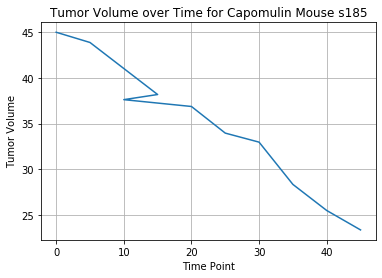

In [62]:
# Set variables to hold relevant data
timepoint = mouse_cap_df["Timepoint"]
tumor_volume = mouse_cap_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mouse s185')
plt.grid(True)
plt.show()



<Figure size 432x288 with 0 Axes>

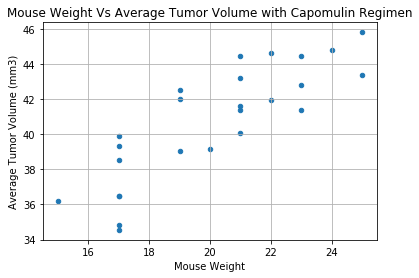

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data = capomulin_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
data_grouped = data.groupby(["Mouse ID","Weight (g)"])
scatter_df = data_grouped["Tumor Volume (mm3)"].mean()#.to_frame()
scatter_df = scatter_df.reset_index()

plt.figure()
scatter_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume with Capomulin Regimen")
#plt.xlim(10, 25)
#plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


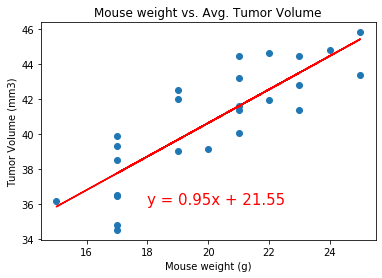

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatterDataDF["Weight (g)"],scatterDataDF["Tumor Volume (mm3)"]) 

x_values = scatter_df["Weight (g)"]
y_values = scatter_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.title('Mouse weight vs. Avg. Tumor Volume')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()